In [402]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from string import punctuation
import re
from utils import *

In [403]:
df_bernardo = pd.read_csv('data/bernardoArevalo.csv')
df_sandra = pd.read_csv('data/sandraTorres.csv')

In [404]:
# Limpieza de datos

df_bernardo = df_bernardo.drop(df_bernardo.columns[0], axis=1)	# Primera columna no es necesaria
df_bernardo = df_bernardo.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
df_bernardo = df_bernardo.drop(['id'], axis=1)
df_bernardo = df_bernardo.drop(['id_str'], axis=1)
df_bernardo = df_bernardo.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('@', '')
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('#', '')

# Eliminar emoji
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_bernardo = df_bernardo[df_bernardo['lang'] == 'es']

match = lambda user_str: re.search(r"'username':\s*'([^']+)'", user_str)
username_from_str = lambda user_str: match(user_str).group(1) if match(user_str) else None
df_bernardo['tweet_username'] = df_bernardo['user'].apply(username_from_str)



In [405]:

# Limpieza de datos

df_sandra = df_sandra.drop(df_sandra.columns[0], axis=1)	# Primera columna no es necesaria
df_sandra = df_sandra.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
if 'id' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id'], axis=1)
if 'id_str' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id_str'], axis=1)
df_sandra = df_sandra.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('@', '')
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('#', '')

# Eliminar emoji
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_sandra = df_sandra[df_sandra['lang'] == 'es']
df_sandra['tweet_username'] = df_sandra['user'].apply(username_from_str)



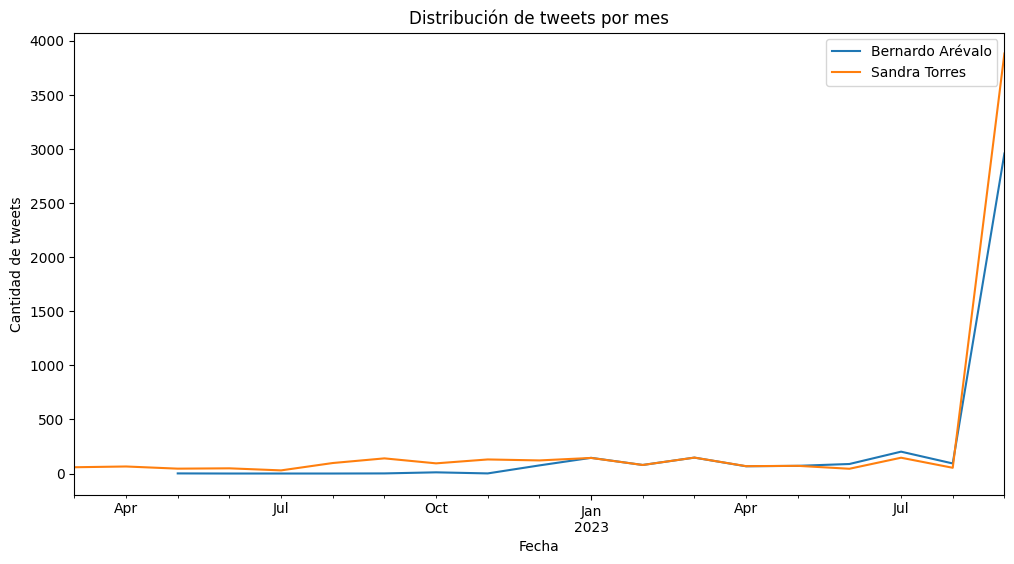

In [419]:

df_bernardo.loc[:, 'date'] = pd.to_datetime(df_bernardo['date'])
df_sandra.loc[:, 'date'] = pd.to_datetime(df_sandra['date'])

tweets_freq_month_b = df_bernardo.resample('M', on='date').size()
tweets_freq_month_s = df_sandra.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
tweets_freq_month_b.plot(label='Bernardo Arévalo')
tweets_freq_month_s.plot(label='Sandra Torres')
plt.title('Distribución de tweets por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.legend()
plt.show()


Se observa que tanto los tweets que involucran tanto a Bernardo Arévalo como Sandra Torres tuvieron su pico más alto en agosto del 2023. Sin embargo, en su mayoría, existió una cantidad ligeramente mayor de Sandra Torres a lo largo del tiempo.